# Nearest neighbor classifier 2

## The Spine Injury dataset

The data set contains information from **310** patients. For each patient, there are: six measurements (**x**) and a label (**y**). The label has **3** possible values, `'NO'` (normal), `'DH'` (herniated disk), or `'SL'` (spondilolysthesis). 

In [19]:
import numpy as np

We now load the dataset and divide the data into a training set of 248 patients and a test set of 62 patients. The following arrays are created:

**`trainx`** : The training data's features | 
**`trainy`** : The training data's labels |
**`testx`** : The test data's features |
**`testy`** : The test data's labels 

In [20]:
# Load data set and code labels as 0 = 'NO', 1 = 'DH', 2 = 'SL'
labels = [b'NO', b'DH', b'SL']
data = np.loadtxt('column_3C.dat', converters={6: lambda s: labels.index(s)} )

# Separate the features from labels
x = data[:,0:6]
y = data[:,6]

# Divide into training and test set
training_indices = list(range(0,20)) + list(range(40,188)) + list(range(230,310))
test_indices = list(range(20,40)) + list(range(188,230))

trainx = x[training_indices,:]
trainy = y[training_indices]
testx = x[test_indices,:]
testy = y[test_indices]

## Nearest neighbor classification ( 1-NN ) with L1 distance

In [21]:
def L1_dist(x,y):
    return np.sum(abs(x-y))

In [22]:
def NN_L1(a,b,c):
    x1 = []
    for i in range(len(c)):
        distances = [L1_dist(c[i],a[j,]) for j in range(len(b))]
        dist_min = np.argmin(distances)
        x1.append(b[dist_min])
    return np.array(x1) 

In [23]:
testy_L1 = NN_L1(trainx, trainy, testx)

## Nearest neighbor classification with L2 distance

In [24]:
def squared_dist(x,y):
    return np.sum(np.square(x-y))

In [25]:
def NN_L2(a,b,c,d):
    x1 = []
    for i in range(len(d)):
        distances = [squared_dist(c[i],a[j,]) for j in range(len(b))]
        dist_min = np.argmin(distances)
        x1.append(b[dist_min])
    return np.array(x1)   

In [26]:
testy_L2 = NN_L2(trainx, trainy, testx, testy)

## Test errors and the confusion matrix

Let's see if the L1 and L2 distance functions yield different error rates for nearest neighbor classification of the test data.

In [27]:
def error_rate(testy, testy_fit):
    return float(sum(testy!=testy_fit))/len(testy) 

print("Error rate of NN_L1: ", round(error_rate(testy,testy_L1), 4) )
print("Error rate of NN_L2: ", round(error_rate(testy,testy_L2), 4) )

Error rate of NN_L1:  0.2258
Error rate of NN_L2:  0.2097


We will now look a bit more deeply into the specific types of errors made by nearest neighbor classification, by constructing the `confusion matrix`.

Since there are three labels, the confusion matrix is a 3x3 matrix whose rows correspond to the true label and whose columns correspond to the predicted label. For example, the entry at row DH, column SL, contains the number of test points whose correct label was DH but which were classified as SL.

<img style="width:200px" src="confusion_matrix.png">




In [29]:
# Test Function
from sklearn.metrics import confusion_matrix

L1_neo = confusion_matrix(testy, testy_L1) 
L2_neo = confusion_matrix(testy, testy_L2)  

[[16  2  2]
 [10 10  0]
 [ 0  0 22]]


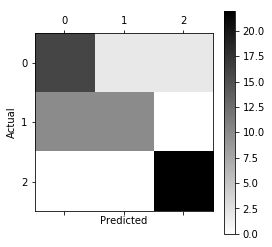

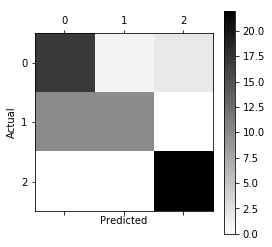

In [32]:
import matplotlib.pyplot as plt

def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.gray_r):
    plt.matshow(df_confusion, cmap=cmap) # imshow
    #plt.title(title)
    plt.colorbar()   
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

print(L1_neo)
plot_confusion_matrix(L1_neo)
plot_confusion_matrix(L2_neo)

In [31]:
print(L2_neo)

[[17  1  2]
 [10 10  0]
 [ 0  0 22]]
